In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('ev_charger_dataset.csv')
df2 = pd.read_excel('ev_charging_station_dataset.xlsx', sheet_name='Table 4', header=1)
df3 = pd.read_excel('ev_market_india_dataset.xlsx')

In [3]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [4]:
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [5]:
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
print('EV CHARGER: ', df1.shape)
print('EV CHARGING STATION ', df2.shape)
print('EV INDIA MARKET: ', df3.shape)

EV CHARGER:  (24, 6)
EV CHARGING STATION  (31, 2)
EV INDIA MARKET:  (103, 14)


In [7]:
print(df1.describe())
print("-----")
print(df1.info())

                 2W            3W           4W         Bus    Chargers
count     24.000000     24.000000    24.000000   24.000000   24.000000
mean    8421.458333   3853.166667   334.041667   28.500000  106.791667
std    10942.261145   8850.690961   476.930628   63.771331   96.623869
min      187.000000    234.000000    12.000000    0.000000   10.000000
25%      848.000000    512.750000    34.750000    0.000000   25.000000
50%     2967.500000    931.000000   129.000000    0.000000   67.500000
75%    10697.750000   2659.250000   434.000000    5.500000  180.250000
max    38558.000000  42881.000000  1895.000000  197.000000  317.000000
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-nul

In [8]:
print(df2.describe())
print("-----")
print(df2.info())

       EV Charging Facility
count             31.000000
mean              49.548387
std               50.768651
min                1.000000
25%                4.000000
50%               26.000000
75%               81.500000
max              174.000000
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes
None


In [9]:
print(df1.describe())
print("-----")
print(df3.info())

                 2W            3W           4W         Bus    Chargers
count     24.000000     24.000000    24.000000   24.000000   24.000000
mean    8421.458333   3853.166667   334.041667   28.500000  106.791667
std    10942.261145   8850.690961   476.930628   63.771331   96.623869
min      187.000000    234.000000    12.000000    0.000000   10.000000
25%      848.000000    512.750000    34.750000    0.000000   25.000000
50%     2967.500000    931.000000   129.000000    0.000000   67.500000
75%    10697.750000   2659.250000   434.000000    5.500000  180.250000
max    38558.000000  42881.000000  1895.000000  197.000000  317.000000
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH   

# Analysis of 2-wheeler EVs

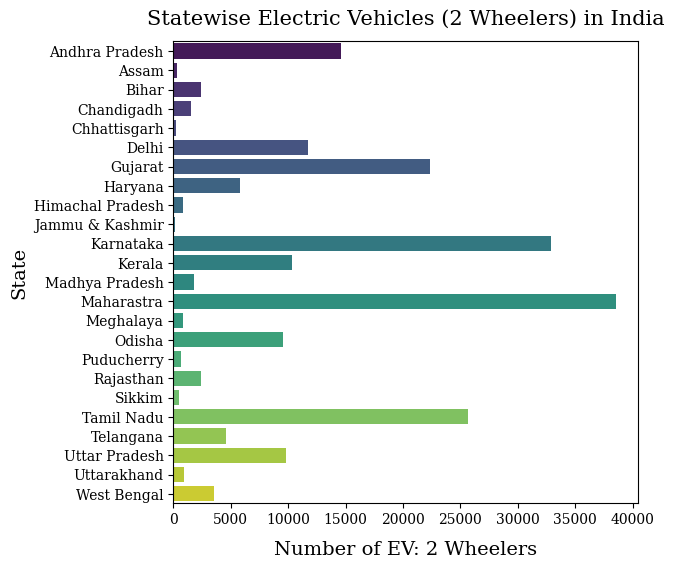

In [10]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

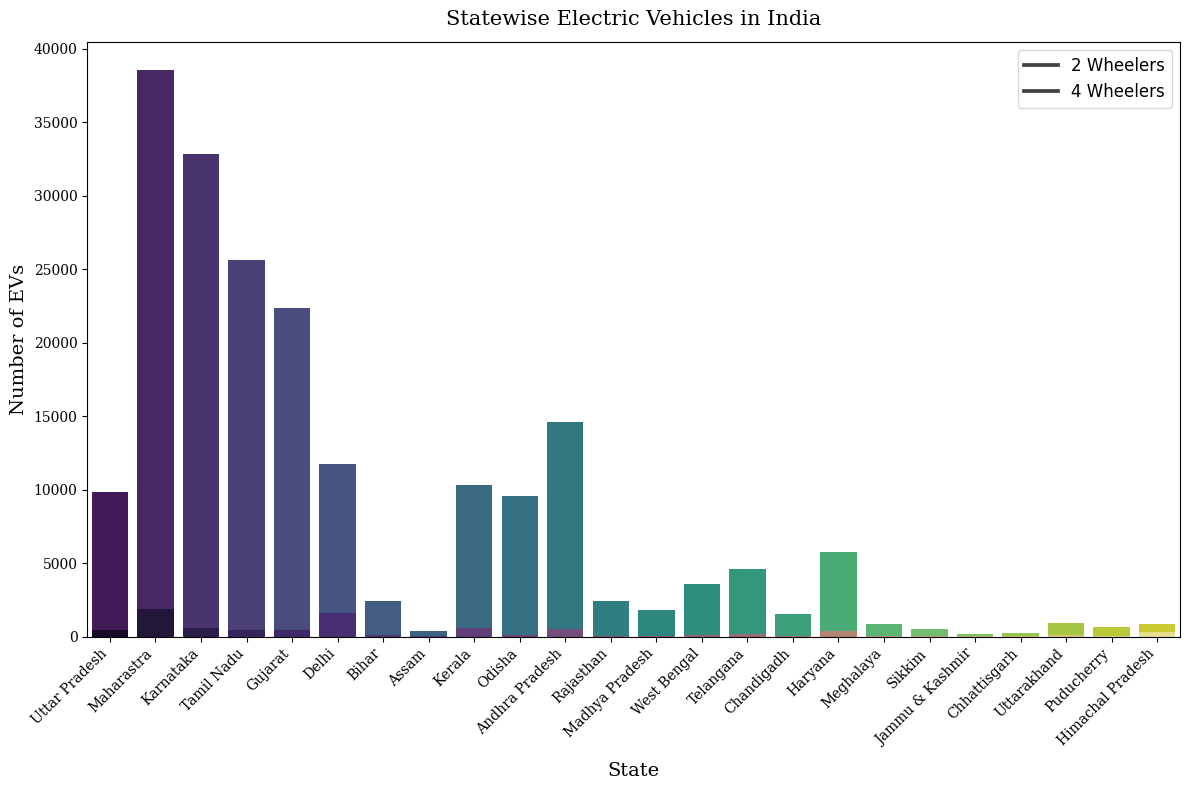

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df1, x='Region', y='2W', palette='viridis')
sns.barplot(data=df1, x='Region', y='4W', palette='magma', alpha=0.7)
plt.xlabel('State', fontsize=14, family='serif', labelpad=10)
plt.ylabel('Number of EVs', fontsize=14, family='serif')
plt.xticks(rotation=45, ha='right', family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.legend(labels=['2 Wheelers', '4 Wheelers'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


# Analysis of 3-wheeler EVs

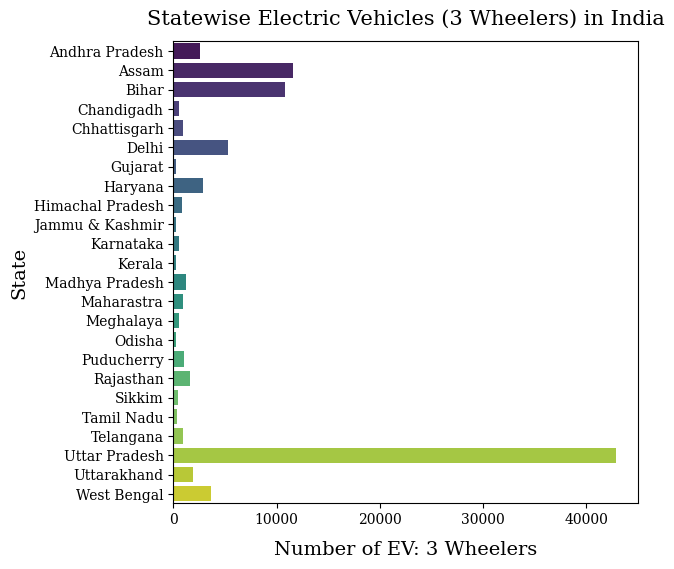

In [12]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis 4-wheeler EVs

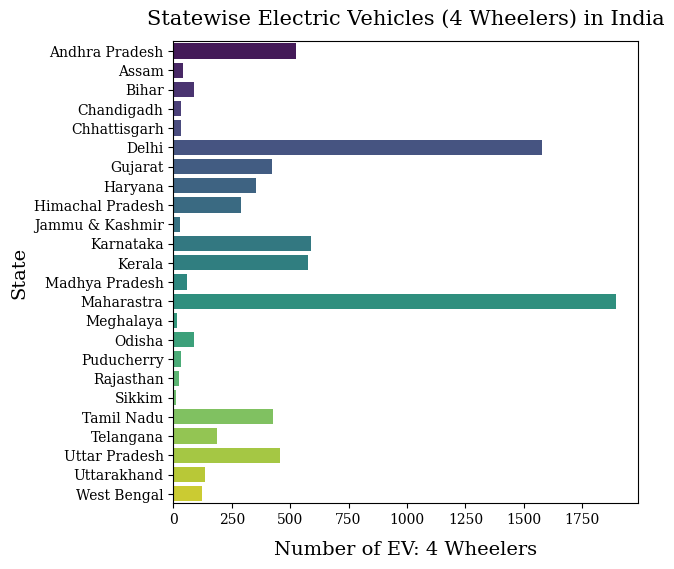

In [13]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis of charging stations sanctioned

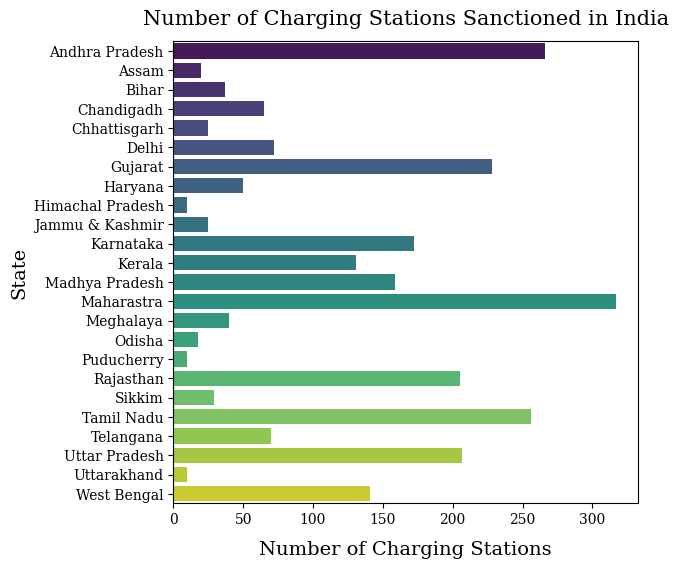

In [14]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis of retail outlets for EV charging

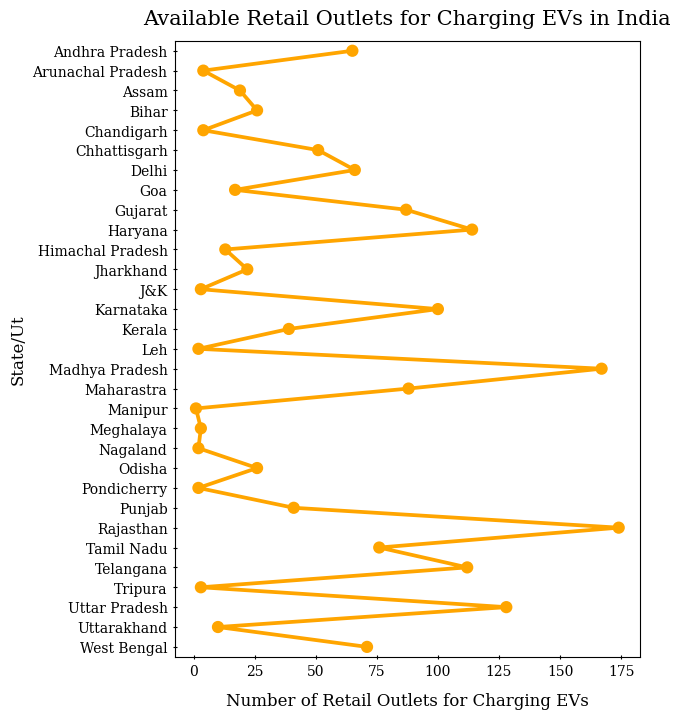

In [15]:
plt.figure(figsize=(6, 8))
sns.pointplot(data=df2, y='State/UT', x='EV Charging Facility', color='orange')
plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('State/Ut', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()

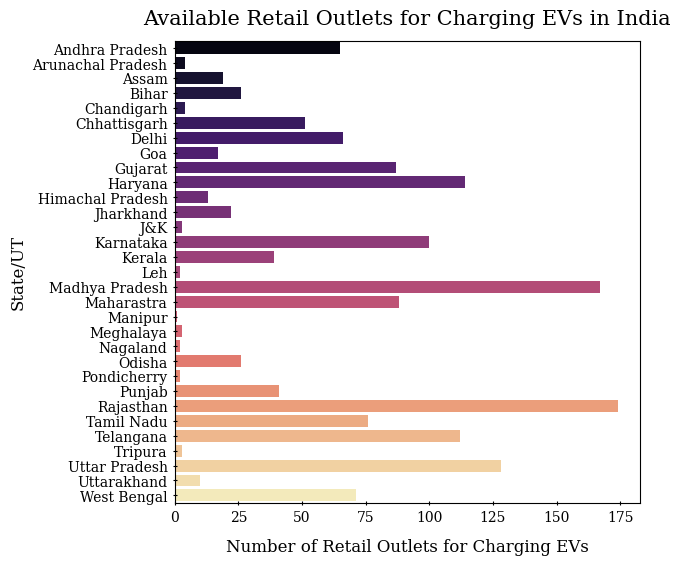

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x='EV Charging Facility', y='State/UT', palette='magma')
plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('State/UT', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()


# Analysis of EVs based on brands

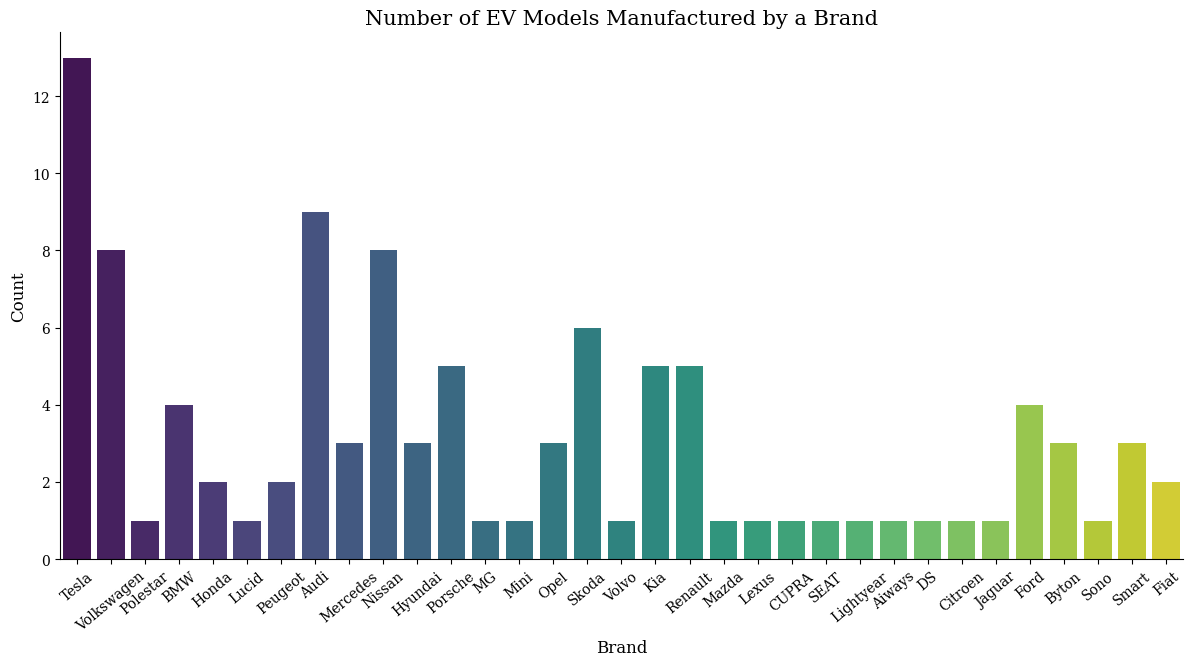

In [17]:
sns.catplot(data=df3, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
# sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

# Anaysis of different body types of EVs

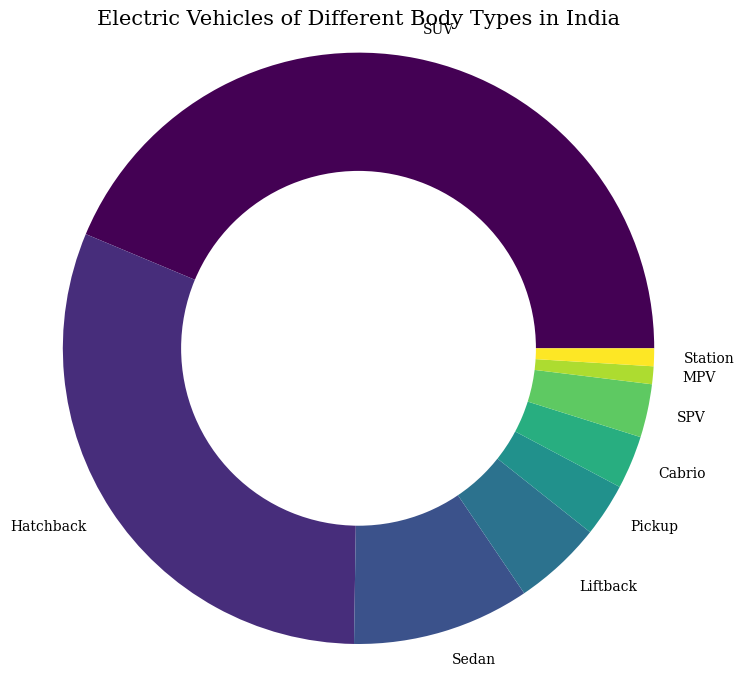

In [18]:
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

# Analysis of EVs of different number of seats

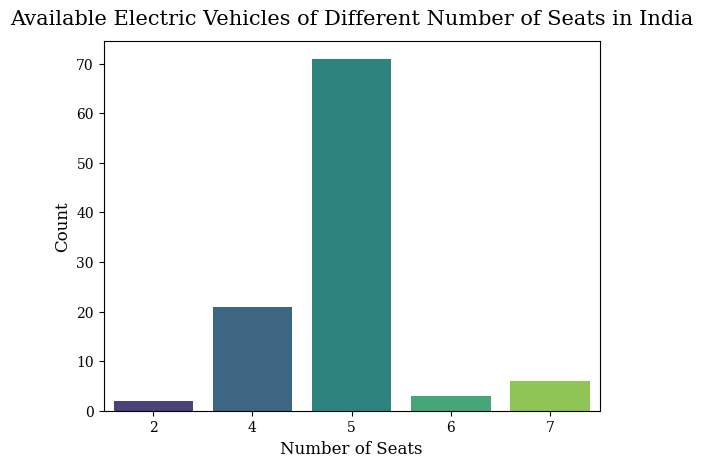

In [19]:
sns.countplot(data=df3, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of the number of seats by each brand

C:\Users\Anirban\AppData\Local\Temp\ipykernel_9468\2194619508.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)


Text(0.5, 1.0, 'Brand-wise Analysis of the Number of Seats')

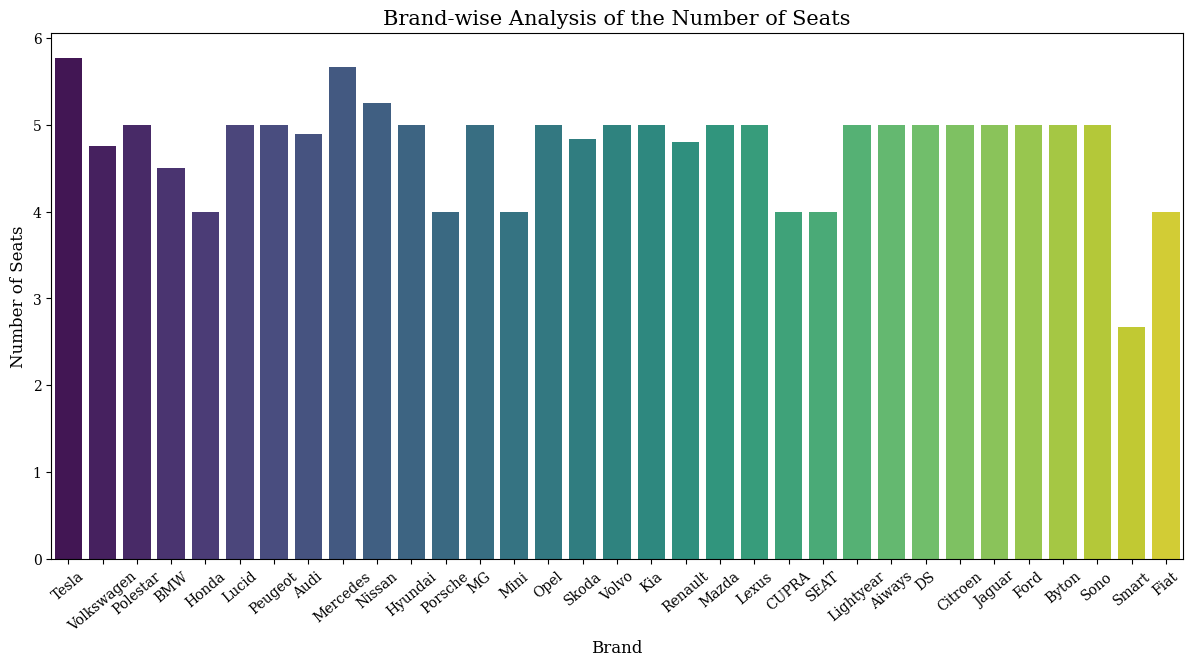

In [20]:
sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)

# Analysis of different plug types

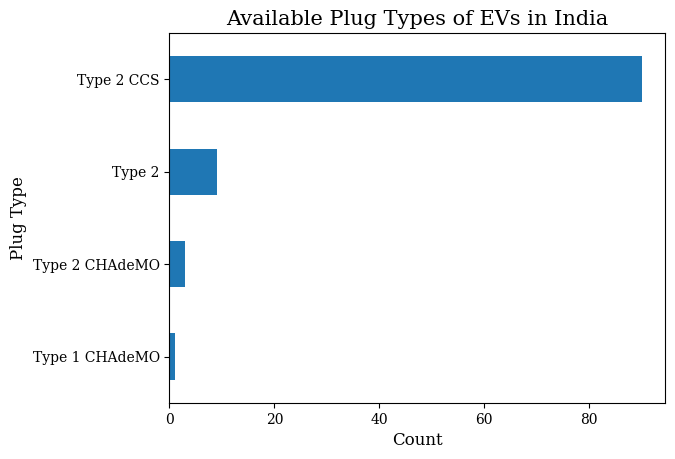

In [21]:
df3['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

# Analysis of EVs based on accleration

C:\Users\Anirban\AppData\Local\Temp\ipykernel_9468\210401422.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None, palette='viridis')


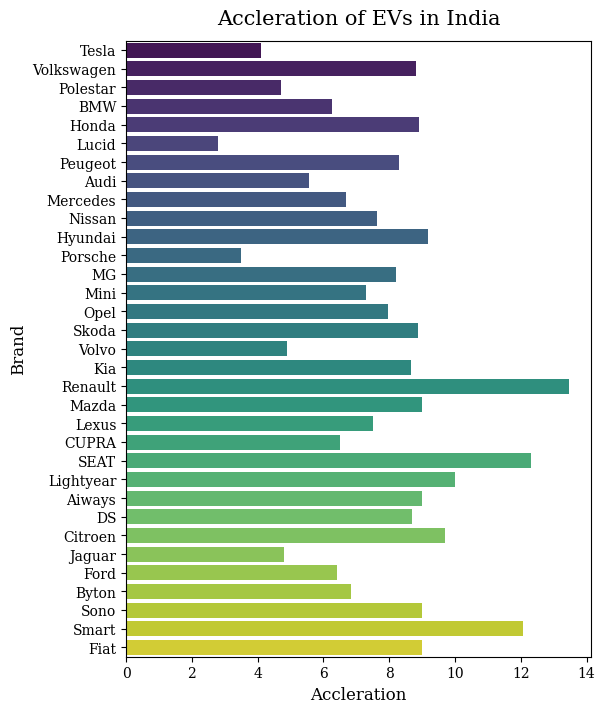

In [22]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of EVs based on speed

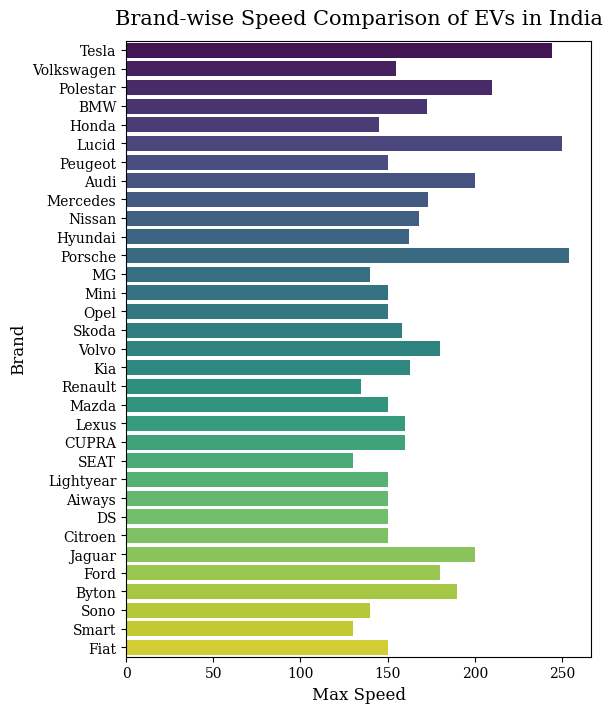

In [23]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', errorbar=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of EVs based on the range parameter

C:\Users\Anirban\AppData\Local\Temp\ipykernel_9468\2360747050.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)


Text(0.5, 1.0, 'Brand-wise Analysis of the Range Parameter')

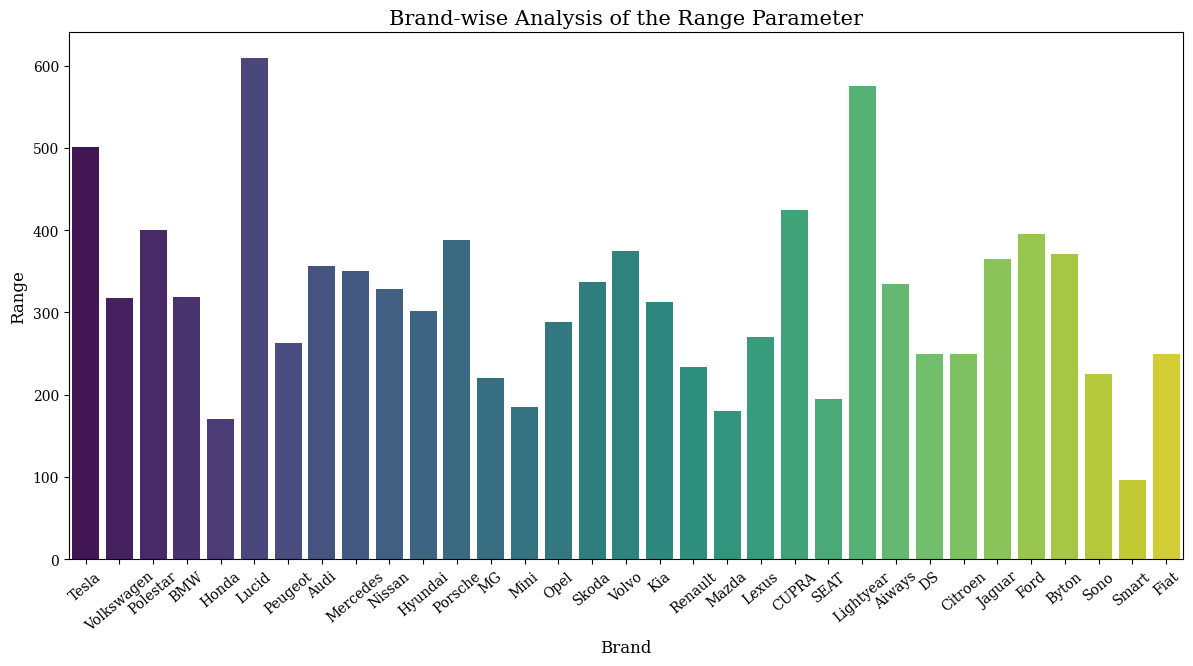

In [24]:
sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15)

# K-Means Clusteing

In [25]:
# PowerTrain feature
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [26]:
# selecting features for building a model
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [27]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


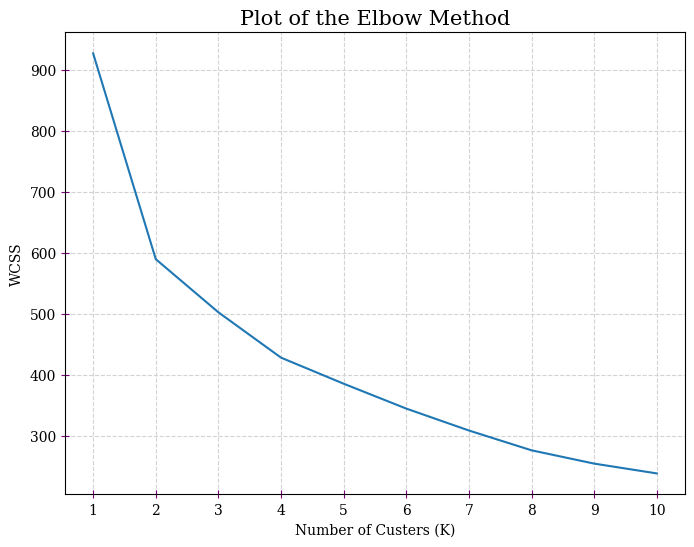

In [29]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [30]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [31]:
print(kmean.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [32]:
pd.Series(kmean.labels_).value_counts()

1    39
2    32
3    19
0    13
dtype: int64

In [33]:
df3['clusters'] = kmean.labels_

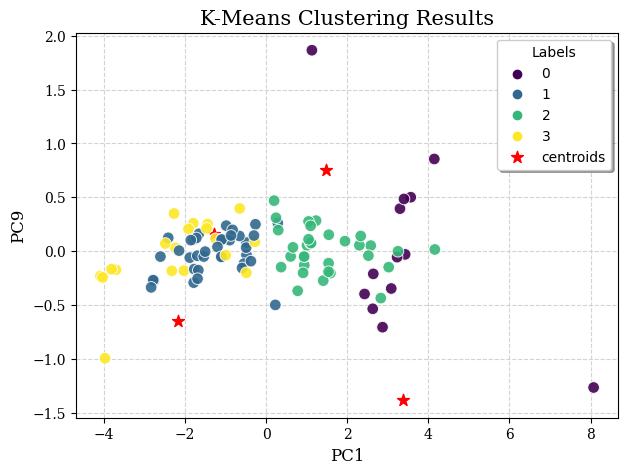

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

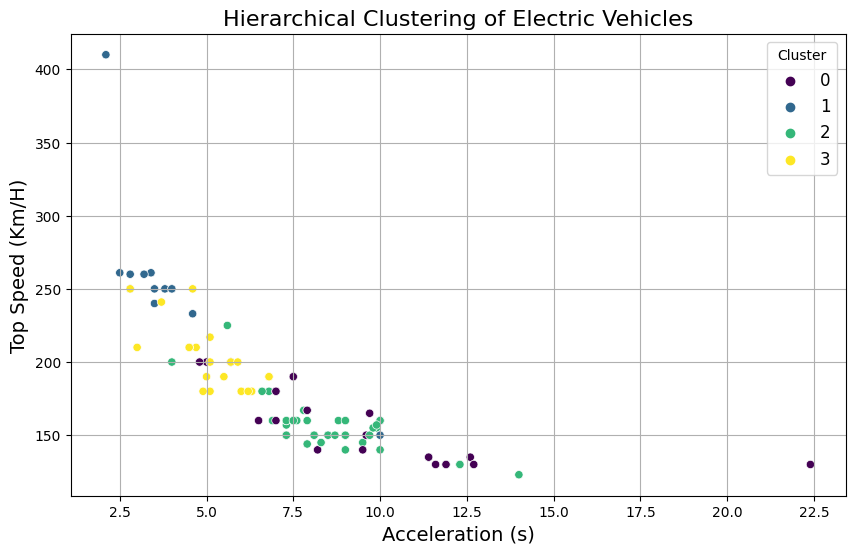

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df3 = pd.read_excel('ev_market_india_dataset.xlsx')

# Convert 'RapidCharge' to numerical values
df3['RapidCharge'] = df3['RapidCharge'].map({'Yes': 1, 'No': 0})

# Replace values in 'PowerTrain' column
df3['PowerTrain'].replace(to_replace=['RWD', 'FWD', 'AWD'], value=[0, 1, 2], inplace=True)

# Select features for clustering
X = df3[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=4)  # You can adjust the number of clusters as needed
clusters = clustering.fit_predict(X_scaled)

# Visualize the results
df3['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='AccelSec', y='TopSpeed_KmH', hue='Cluster', palette='viridis')
plt.xlabel('Acceleration (s)', fontsize=14)
plt.ylabel('Top Speed (Km/H)', fontsize=14)
plt.title('Hierarchical Clustering of Electric Vehicles', fontsize=16)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()


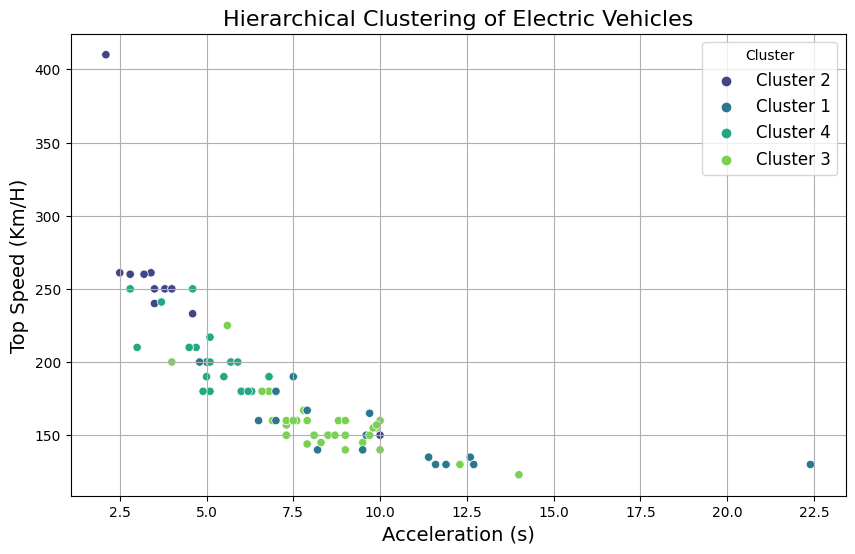

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df3 = pd.read_excel('ev_market_india_dataset.xlsx')

# Convert 'RapidCharge' to numerical values
df3['RapidCharge'] = df3['RapidCharge'].map({'Yes': 1, 'No': 0})

# Replace values in 'PowerTrain' column
df3['PowerTrain'].replace(to_replace=['RWD', 'FWD', 'AWD'], value=[0, 1, 2], inplace=True)

# Select features for clustering
X = df3[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=4)  # You can adjust the number of clusters as needed
clusters = clustering.fit_predict(X_scaled)

# Assign labels to clusters
cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
df3['Cluster'] = [cluster_labels[label] for label in clusters]

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='AccelSec', y='TopSpeed_KmH', hue='Cluster', palette='viridis')
plt.xlabel('Acceleration (s)', fontsize=14)
plt.ylabel('Top Speed (Km/H)', fontsize=14)
plt.title('Hierarchical Clustering of Electric Vehicles', fontsize=16)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()


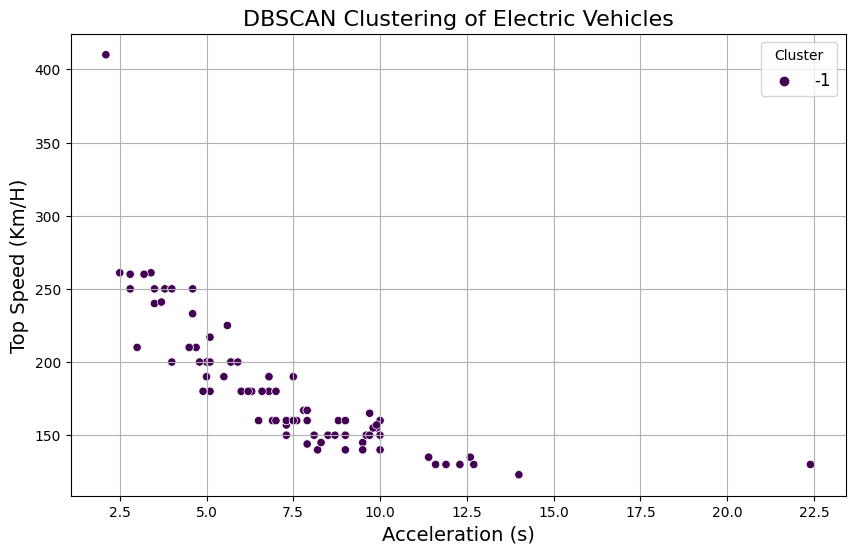

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df3 = pd.read_excel('ev_market_india_dataset.xlsx')

# Convert 'RapidCharge' to numerical values
df3['RapidCharge'] = df3['RapidCharge'].map({'Yes': 1, 'No': 0})

# Replace values in 'PowerTrain' column
df3['PowerTrain'].replace(to_replace=['RWD', 'FWD', 'AWD'], value=[0, 1, 2], inplace=True)

# Select features for clustering
X = df3[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust the hyperparameters as needed
clusters = dbscan.fit_predict(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='AccelSec', y='TopSpeed_KmH', hue=clusters, palette='viridis', legend='full')
plt.xlabel('Acceleration (s)', fontsize=14)
plt.ylabel('Top Speed (Km/H)', fontsize=14)
plt.title('DBSCAN Clustering of Electric Vehicles', fontsize=16)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()


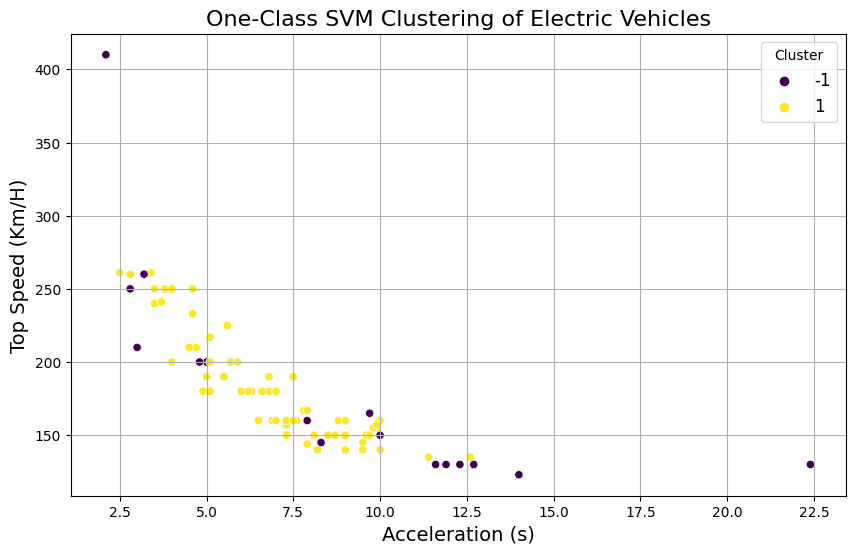

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df3 = pd.read_excel('ev_market_india_dataset.xlsx')

# Convert 'RapidCharge' to numerical values
df3['RapidCharge'] = df3['RapidCharge'].map({'Yes': 1, 'No': 0})

# Replace values in 'PowerTrain' column
df3['PowerTrain'].replace(to_replace=['RWD', 'FWD', 'AWD'], value=[0, 1, 2], inplace=True)

# Select features for clustering
X = df3[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform One-Class SVM clustering
svm = OneClassSVM(kernel='rbf', nu=0.1)  # You can adjust the hyperparameters as needed
clusters = svm.fit_predict(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='AccelSec', y='TopSpeed_KmH', hue=clusters, palette='viridis', legend='full')
plt.xlabel('Acceleration (s)', fontsize=14)
plt.ylabel('Top Speed (Km/H)', fontsize=14)
plt.title('One-Class SVM Clustering of Electric Vehicles', fontsize=16)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()
